In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os

In [2]:
# clusters : 'N','Y'
# frame/seg : 'F','S'
# cwt : '-','N','Y'
# window : '-','F','H'
# model : ['svm', 'RF', 'DNN', 'LSTM']

# [acc  ,FA  ,DR  ] ph7.4 train
# [acc.1,FA.1,DR.1] ph7.4 test
# [acc.2,FA.2,DR.2] ph7.4 true test
# [acc.3,FA.3,DR.3] sel 1 train
# [acc.4,FA.4,DR.4] sel 1 test
# [acc.5,FA.5,DR.5] sel 1 true test

# colors 'r','orange','y','g','c','b','m'

In [3]:
df = pd.read_csv('../final_data/result1.csv')

In [ ]:
df

In [4]:
save_root = '../final_data/analysis_plot/'

### Graph 1

In [ ]:
# compare
for compare in [0,1,2,3,4]:# 0 cluster, 1 frame/seg, 2 cwt, 3 window, 4 model
    # axis select
    for ax1, ax2 in [[0,1],[0,2],[1,2]]:
        # axes
        axes = ['Accuracy', 'False Alerm', 'Detection Rate']
        axess = ['ACC','FA','DR']
        # subplots
        cols = [['acc'  ,'FA'  ,'DR'  ],['acc.1','FA.1','DR.1'],['acc.2','FA.2','DR.2'],
                ['acc.3','FA.3','DR.3'],['acc.4','FA.4','DR.4'],['acc.5','FA.5','DR.5']]
        subtitles = ['train pH7.4','test pH7.4','true test pH7.4',
                    'train Select 1','test Select 1','true test Select 1']
        # select exp
        compares = {
            0:['N','Y'],
            1:['F','S'],
            2:['-','N','Y'],
            3:['-','F','H'],
            4:['svm', 'RF', 'DNN', 'LSTM']
        }
        legends = {
            0:['No cluster', 'Add cluster'],
            1:['Frame', 'Segment'],
            2:['frame','No CWT', 'Add CWT'],
            3:['frame','Full window', 'Half window'],
            4:['SVM', 'Random Forest', 'DNN', 'LSTM']
        }
        cmp_titles = {
            0:'Clustser',
            1:'FrameOrSegment',
            2:'CWT',
            3:'Window',
            4:'Model'
        }

        
        colors = cm.rainbow(np.linspace(0, 1, len(compares[compare])))
        title = cmp_titles[compare]+'_Compare_'+axess[ax1]+'-'+axess[ax2]
        save_path = save_root+title+'/'
        if not os.path.isdir(save_path):
            os.makedirs(save_path)

        for i in range(6):
            ax = cols[i]
            plt.figure()
            for j, cmp in enumerate(compares[compare]):
                x = df[df.iloc[:,compare]==cmp][ax[ax1]].tolist()
                y = df[df.iloc[:,compare]==cmp][ax[ax2]].tolist()
                plt.scatter(x,y, color=colors[j], label=legends[compare][j])
            plt.title(subtitles[i])
            plt.xlim(0,1)
            plt.xlabel(axes[ax1])
            plt.ylim(0,1)
            plt.ylabel(axes[ax2])
            plt.legend()
            plt.savefig(save_path+str(i+1)+'.png')

### Graph2

In [ ]:
# compare
compare = 4 # 0 cluster, 2 cwt, 3 window, 4 model
# axis select
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
# subplots
cols = [['acc'  ,'FA'  ,'DR'  ],['acc.1','FA.1','DR.1'],['acc.2','FA.2','DR.2'],
        ['acc.3','FA.3','DR.3'],['acc.4','FA.4','DR.4'],['acc.5','FA.5','DR.5']]
subtitles = ['train pH7.4','test pH7.4','true test pH7.4',
            'train Select 1','test Select 1','true test Select 1']
# select exp
compares = {
    0:['N','Y'],
    1:['F','S'],
    2:['N','Y'],
    3:['F','H'],
    4:['svm', 'RF', 'DNN', 'LSTM']
}
legends = {
    0:['No cluster', 'Add cluster'],
    1:['Frame', 'Segment'],
    2:['No CWT', 'Add CWT'],
    3:['Full window', 'Half window'],
    4:['SVM', 'Random Forest', 'DNN', 'LSTM']
}
cmp_titles = {
    0:'Clustser',
    1:'FrameOrSegment',
    2:'CWT',
    3:'Window',
    4:'Model'
}
cmp = compares[compare]
title = 'BAR_'+cmp_titles[compare]+'_Compare'
save_path = save_root+title+'/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)

for i in range(6):
    ax = cols[i]
    for j, axi in enumerate(ax):
        plt.figure()
        a = df[df.iloc[:,compare]==cmp[0]][axi].to_numpy() # No
        b = df[df.iloc[:,compare]==cmp[1]][axi].to_numpy() # add

        # no sort diff
        diff_idx = np.arange(len(a))
        '''
        # sort difference
        if j==1:
            diff_idx = sorted(np.arange(len(a)), key=lambda idx:(b-a)[idx] ,reverse=False)
        else:
            diff_idx = sorted(np.arange(len(a)), key=lambda idx:(b-a)[idx] ,reverse=True)

        # select with threshold
        diff_idx = np.array(diff_idx)
        diff_idx = diff_idx[np.where(abs((b-a)[diff_idx])>0.05)]
        '''
        # table under plot
        cell = []
        raw_labels = []
        for k in range(5):
            if k==compare:
                continue
            row = df[df.iloc[:,compare]==cmp[0]].iloc[:,k].to_numpy()
            cell.append(row[diff_idx])
            raw_labels.append(cmp_titles[k])

        # plot
        plt.title(subtitles[i])
        x = np.arange(len(diff_idx))
        width = 0.2
        plt.bar(x - width/2, a[diff_idx], width, label=legends[compare][0])
        plt.bar(x + width/2, b[diff_idx], width, label=legends[compare][1])
        plt.xticks([])
        plt.ylabel(axes[j])
        plt.legend()
        
        # plot table
        if len(x)!=0:
            plt.table(cellText=cell,
                    rowLabels=raw_labels,
                    colLabels=['']*len(diff_idx),
                    loc='bottom')

            #save figure
            plt.savefig(save_path+axes[j]+'_'+str(i+1)+'.png', bbox_inches="tight")

### Graph2 for model

In [ ]:
# compare
compare = 4 # 0 cluster, 2 cwt, 3 window, 4 model
# axis select
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
# subplots
cols = [['acc'  ,'FA'  ,'DR'  ],['acc.1','FA.1','DR.1'],['acc.2','FA.2','DR.2'],
        ['acc.3','FA.3','DR.3'],['acc.4','FA.4','DR.4'],['acc.5','FA.5','DR.5']]
subtitles = ['train pH7.4','test pH7.4','true test pH7.4',
            'train Select 1','test Select 1','true test Select 1']
# select exp
compares = {
    0:['N','Y'],
    1:['F','S'],
    2:['N','Y'],
    3:['F','H'],
    4:['svm', 'RF', 'DNN', 'LSTM']
}
legends = {
    0:['No cluster', 'Add cluster'],
    1:['Frame', 'Segment'],
    2:['No CWT', 'Add CWT'],
    3:['Full window', 'Half window'],
    4:['SVM', 'Random Forest', 'DNN', 'LSTM']
}
cmp_titles = {
    0:'Clustser',
    1:'FrameOrSegment',
    2:'CWT',
    3:'Window',
    4:'Model'
}
cmp = compares[compare]
title = 'BAR_'+cmp_titles[compare]+'_Compare'
save_path = save_root+title+'/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)

for i in range(6):
    ax = cols[i]
    for j, axi in enumerate(ax):
        plt.figure()
        a = df[df.iloc[:,compare]==cmp[0]][axi].to_numpy() 
        b = df[df.iloc[:,compare]==cmp[1]][axi].to_numpy() 
        c = df[df.iloc[:,compare]==cmp[2]][axi].to_numpy()
        d = np.concatenate([[0,0],df[df.iloc[:,compare]==cmp[3]][axi].to_numpy()])

        # no sort diff
        diff_idx = np.arange(len(a))

        # table under plot
        cell = []
        raw_labels = []
        for k in range(5):
            if k==compare:
                continue
            row = df[df.iloc[:,compare]==cmp[0]].iloc[:,k].to_numpy()
            cell.append(row[diff_idx])
            raw_labels.append(cmp_titles[k])

        # plot
        plt.title(subtitles[i])
        x = np.arange(len(diff_idx))
        width = 0.2
        plt.bar(x - 2*width, a[diff_idx], width, label=legends[compare][0])
        plt.bar(x - width, b[diff_idx], width, label=legends[compare][1])
        plt.bar(x , c[diff_idx], width, label=legends[compare][2])
        plt.bar(x + width, d[diff_idx], width, label=legends[compare][3])
        plt.xticks([])
        plt.ylabel(axes[j])
        plt.legend()
        
        # plot table
        if len(x)!=0:
            plt.table(cellText=cell,
                    rowLabels=raw_labels,
                    colLabels=['']*len(diff_idx),
                    loc='bottom')

            #save figure
            plt.savefig(save_path+axes[j]+'_'+str(i+1)+'.png', bbox_inches="tight")

### Graph2 for FOS

In [141]:
cmp = ['F','S']
df[df.iloc[:,1]==cmp[1]][df.iloc[:,4]!='LSTM']

C:\Users\x\AppData\Local\Temp\ipykernel_1029744\1996619252.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.iloc[:,1]==cmp[1]][df.iloc[:,4]!='LSTM']


,cluster,frame/seg,cwt,window,model,acc,FA,DR,acc.1,FA.1,...,DR.2,acc.3,FA.3,DR.3,acc.4,FA.4,DR.4,acc.5,FA.5,DR.5
6,N,S,N,F,svm,0.997275,0.000938,0.995350,0.820760,0.107548,...,0,0.994349,0.001500,0.986539,0.825735,0.099132,0.684467,0.637360,0.176973,0.215859
7,Y,S,N,F,svm,0.993771,0.001820,0.993328,0.788712,0.074776,...,0,0.992315,0.002300,0.993162,0.793261,0.060592,0.557272,0.668253,0.121150,0.253314
8,N,S,N,F,RF,1.000000,0.000000,1.000000,0.734947,0.067532,...,0,1.000000,0.000000,1.000000,0.760304,0.020806,0.348738,0.708846,0.015524,0.083113
9,Y,S,N,F,RF,1.000000,0.000000,1.000000,0.780247,0.024523,...,0,1.000000,0.000000,1.000000,0.798780,0.006223,0.344462,0.713247,0.010692,0.080492
10,N,S,N,F,DNN,0.518540,0.000375,0.000202,0.518310,0.000458,...,0,0.652954,0.000000,0.000000,0.652806,0.000000,0.000000,0.694207,0.000000,0.000000
11,Y,S,N,F,DNN,0.271922,0.123850,0.049073,0.270294,0.125319,...,0,0.329792,0.104556,0.047357,0.327718,0.103340,0.044348,0.359587,0.094669,0.030303
14,N,S,N,H,svm,0.998050,0.001129,0.997165,0.753459,0.158512,...,0,0.997584,0.001388,0.995650,0.769227,0.137259,0.593387,0.661160,0.198396,0.342337
15,Y,S,N,H,svm,0.997854,0.001122,0.998716,0.727120,0.107648,...,0,0.996225,0.000392,0.994681,0.737856,0.085083,0.492986,0.659903,0.118779,0.222428
16,N,S,N,H,RF,1.000000,0.000000,1.000000,0.705630,0.077780,...,0,1.000000,0.000000,1.000000,0.739058,0.024282,0.294050,0.708206,0.015779,0.081621
17,Y,S,N,H,RF,1.000000,0.000000,1.000000,0.721408,0.039658,...,0,1.000000,0.000000,1.000000,0.748235,0.014313,0.304341,0.702280,0.016731,0.084337


In [ ]:
# compare
compare = 1
# axis select
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
# subplots
cols = [['acc'  ,'FA'  ,'DR'  ],['acc.1','FA.1','DR.1'],['acc.2','FA.2','DR.2'],
        ['acc.3','FA.3','DR.3'],['acc.4','FA.4','DR.4'],['acc.5','FA.5','DR.5']]
subtitles = ['train pH7.4','test pH7.4','true test pH7.4',
            'train Select 1','test Select 1','true test Select 1']
# select exp
compares = {
    0:['N','Y'],
    1:['F','S'],
    2:['N','Y'],
    3:['F','H'],
    4:['svm', 'RF', 'DNN', 'LSTM']
}
legends = {
    0:['No cluster', 'Add cluster'],
    1:['Frame', 'Segment'],
    2:['No CWT', 'Add CWT'],
    3:['Full window', 'Half window'],
    4:['SVM', 'Random Forest', 'DNN', 'LSTM']
}
cmp_titles = {
    0:'Clustser',
    1:'FrameOrSegment',
    2:'CWT',
    3:'Window',
    4:'Model'
}
cmp = compares[compare]
title = 'BAR_'+cmp_titles[compare]+'_Compare'
save_path = save_root+title+'/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)

for i in range(6):
    ax = cols[i]
    for j, axi in enumerate(ax):
        plt.figure()
        a = df[df.iloc[:,compare]==cmp[0]][axi].to_numpy() 
        b = df[df.iloc[:,compare]==cmp[1]][axi].to_numpy() 
        c = df[df.iloc[:,compare]==cmp[2]][axi].to_numpy()
        d = np.concatenate([[0,0],df[df.iloc[:,compare]==cmp[3]][axi].to_numpy()])

        # no sort diff
        diff_idx = np.arange(len(a))

        # table under plot
        cell = []
        raw_labels = []
        for k in range(5):
            if k==compare:
                continue
            row = df[df.iloc[:,compare]==cmp[0]].iloc[:,k].to_numpy()
            cell.append(row[diff_idx])
            raw_labels.append(cmp_titles[k])

        # plot
        plt.title(subtitles[i])
        x = np.arange(len(diff_idx))
        width = 0.2
        plt.bar(x - 2*width, a[diff_idx], width, label=legends[compare][0])
        plt.bar(x - width, b[diff_idx], width, label=legends[compare][1])
        plt.bar(x , c[diff_idx], width, label=legends[compare][2])
        plt.bar(x + width, d[diff_idx], width, label=legends[compare][3])
        plt.xticks([])
        plt.ylabel(axes[j])
        plt.legend()
        
        # plot table
        if len(x)!=0:
            plt.table(cellText=cell,
                    rowLabels=raw_labels,
                    colLabels=['']*len(diff_idx),
                    loc='bottom')

            #save figure
            plt.savefig(save_path+axes[j]+'_'+str(i+1)+'.png', bbox_inches="tight")

### graph 3

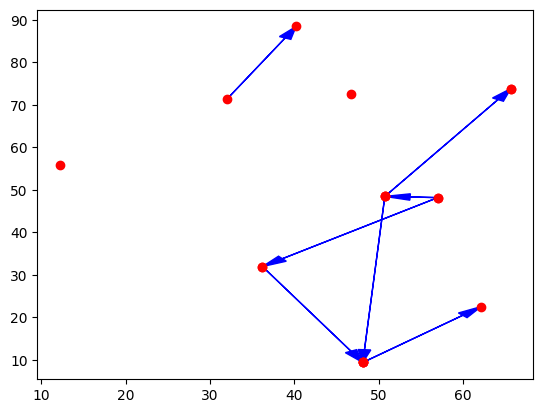

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

data = np.genfromtxt('file1.dat', delimiter=',', skip_header=1, names=['MAG', 'X0', 'Y0','X1','Y1'])
plt.scatter(data['X0'], data['Y0'], color='r', zorder=10)
plt.scatter(data['X1'], data['Y1'], color='r', zorder=10)

for d in data:
    if(d['MAG'] > 0):
        plt.arrow(d['X0'],d['Y0'],d['X1']-d['X0'], d['Y1']-d['Y0'], 
         shape='full', color='b', lw=1, length_includes_head=True, 
         zorder=0, head_length=3., head_width=1.5)

plt.show()

### Graph 4

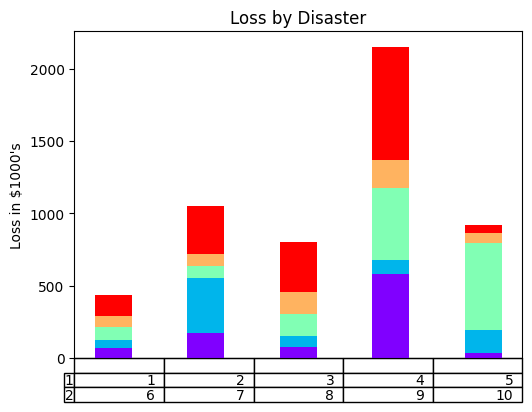

In [86]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = cm.rainbow(np.linspace(0, 1, len(rows))) #plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
cell_text = [[1,2,3,4,5],[6,7,8,9,10]]
plt.table(cellText=cell_text,
            rowLabels=[1,2],
            colLabels=['']*5,
            loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()